<a href="https://colab.research.google.com/github/NikhilRao27/MLprojects/blob/main/LSTM_ARIMA_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#importing the required libraries and using yahoo finance to fetch the historical stock price.

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# here we are giving the apple stock price
stock_symbol = "AAPL"
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Fetching data for the last 5 years

# Fetch historical stock price data
df = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the closing prices
df = df[['Close']]
df.reset_index(inplace=True)

# Prepare the data
dataset = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i : (i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30  # Number of time steps to consider
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
epochs = 50  # Number of training epochs
model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Undo the scaling of the data
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Plot the actual and predicted prices
train_data_len = len(df) - len(test_data)
train_dates = df['Date'][:train_data_len + time_steps]
test_dates = df['Date'][train_data_len + time_steps:]




Epoch 1/50
61/61 [==============================] - 7s 49ms/step - loss: 0.0156
Epoch 2/50
61/61 [==============================] - 2s 34ms/step - loss: 8.7221e-04
Epoch 3/50
61/61 [==============================] - 2s 34ms/step - loss: 8.3288e-04
Epoch 4/50
61/61 [==============================] - 2s 33ms/step - loss: 8.4824e-04
Epoch 5/50
61/61 [==============================] - 2s 34ms/step - loss: 9.3502e-04
Epoch 6/50
61/61 [==============================] - 2s 32ms/step - loss: 8.3668e-04
Epoch 7/50
61/61 [==============================] - 3s 48ms/step - loss: 6.9546e-04
Epoch 8/50
61/61 [==============================] - 2s 34ms/step - loss: 7.0390e-04
Epoch 9/50
61/61 [==============================] - 2s 32ms/step - loss: 6.1246e-04
Epoch 10/50
61/61 [==============================] - 2s 33ms/step - loss: 6.3678e-04
Epoch 11/50
61/61 [==============================] - 2s 32ms/step - loss: 5.9121e-04
Epoch 12/50
61/61 [==============================] - 2s 33ms/step - loss: 6.11

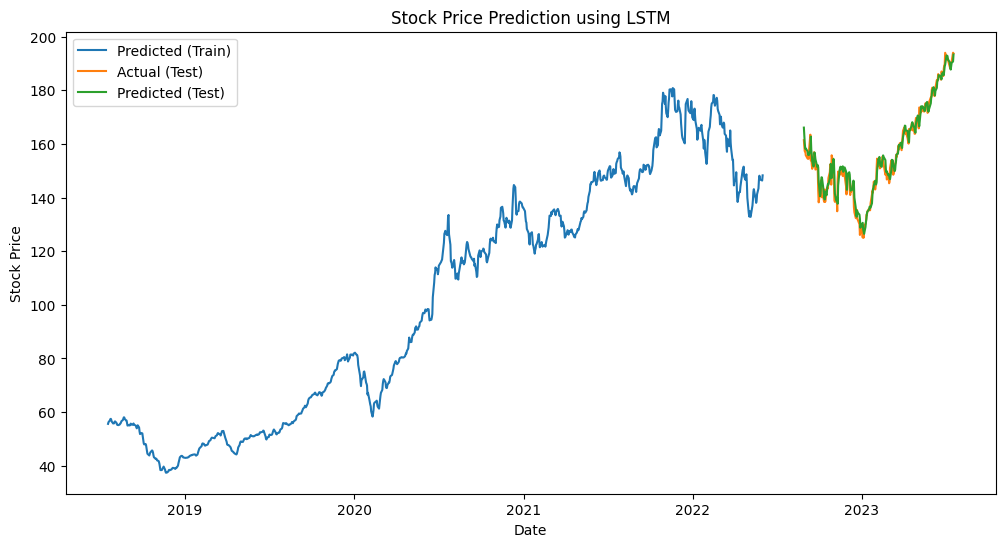

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(train_dates[:len(train_predictions)], train_predictions.flatten(), label='Predicted (Train)')
plt.plot(test_dates, y_test.flatten(), label='Actual (Test)')
plt.plot(test_dates, test_predictions.flatten(), label='Predicted (Test)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train.flatten(), train_predictions.flatten())
test_mse = mean_squared_error(y_test.flatten(), test_predictions.flatten())
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 5.805044940666339
Test MSE: 8.998709545048113


1/1 [==============================] - 0s 25ms/step
The stock price prediciton for next sixty days is : 2023-07-19 00:00:00  :  [193.81978]
The stock price prediciton for next sixty days is : 2023-07-20 00:00:00  :  [193.72975]
The stock price prediciton for next sixty days is : 2023-07-21 00:00:00  :  [193.44348]
The stock price prediciton for next sixty days is : 2023-07-22 00:00:00  :  [193.0487]
The stock price prediciton for next sixty days is : 2023-07-23 00:00:00  :  [192.6103]
The stock price prediciton for next sixty days is : 2023-07-24 00:00:00  :  [192.17738]
The stock price prediciton for next sixty days is : 2023-07-25 00:00:00  :  [191.78131]
The stock price prediciton for next sixty days is : 2023-07-26 00:00:00  :  [191.43805]
The stock price prediciton for next sixty days is : 2023-07-27 00:00:00  :  [191.15053]
The stock price prediciton for next sixty days is : 2023-07-28 00:00:00  :  [190.91272]
The stock price prediciton for next sixty days is : 2023-07-29 00:00:0

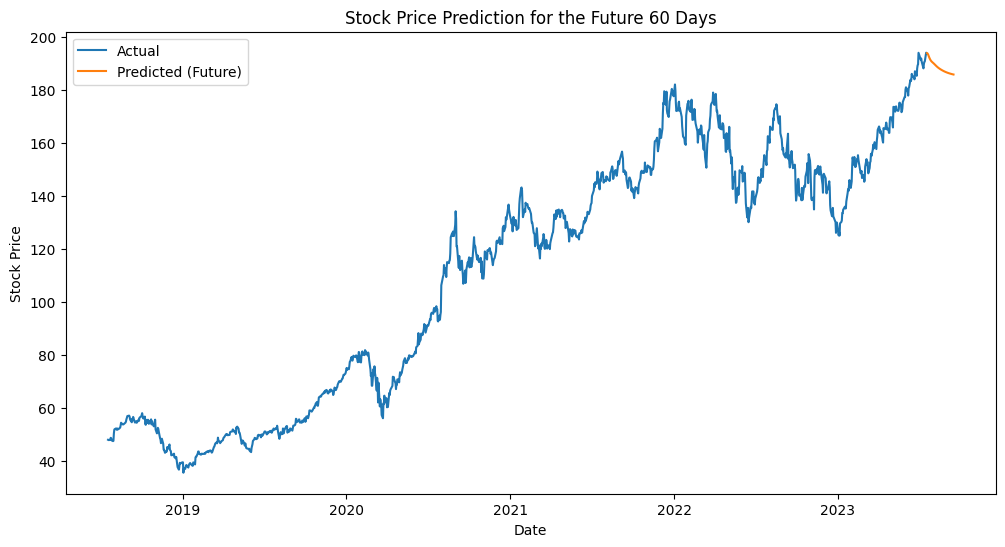

In [54]:
# Get the last 30 days of the training data
last_30_days = scaled_data[-time_steps:]

# Generate predictions for the future 60 days
future_predictions = []
for _ in range(60):
    # Prepare the input sequence for prediction
    input_sequence = last_30_days.reshape(1, time_steps, 1)

    # Predict the stock price for the next day
    predicted_price = model.predict(input_sequence)

    # Store the predicted price and update the input sequence
    future_predictions.append(predicted_price[0, 0])
    last_30_days = np.append(last_30_days[1:], predicted_price[0, 0])

# Undo the scaling of the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


# Generate future dates for the predictions
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=60, freq='D')
for i in range(60):
 print("The stock price prediciton for next sixty days is :",future_dates[i]," : ", future_predictions[i])


# Plot the predicted prices for the future 60 days
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual')
plt.plot(future_dates, future_predictions, label='Predicted (Future)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Future 60 Days')
plt.legend()
plt.show()


**ARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


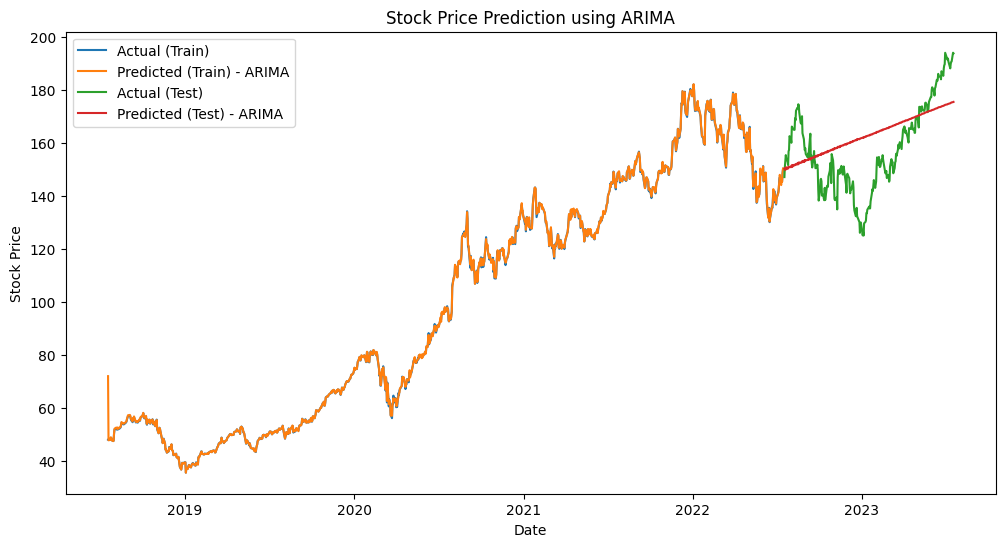

Train MSE - ARIMA: 0.6999713873533248
Test MSE - ARIMA: 217.59288798308972


In [50]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the stock symbol and date range
stock_symbol = "AAPL"
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Fetching data for the last 5 years

# Fetch historical stock price data
df = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the closing prices
df = df[['Close']]
df.reset_index(inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Train the ARIMA model
model_arima = ARIMA(train_data['Close'], order=(5, 2, 4))
model_arima_fit = model_arima.fit()

# Make predictions
train_predictions_arima = model_arima_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions_arima = model_arima_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Calculate Mean Squared Error (MSE)
train_mse_arima = mean_squared_error(train_data['Close'], train_predictions_arima)
test_mse_arima = mean_squared_error(test_data['Close'], test_predictions_arima)

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:train_size], train_data['Close'], label='Actual (Train)')
plt.plot(df['Date'][:train_size], train_predictions_arima, label='Predicted (Train) - ARIMA')
plt.plot(df['Date'][train_size:], test_data['Close'], label='Actual (Test)')
plt.plot(df['Date'][train_size:], test_predictions_arima, label='Predicted (Test) - ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

# Print the Mean Squared Error (MSE)
print("Train MSE - ARIMA:", train_mse_arima)
print("Test MSE - ARIMA:", test_mse_arima)
